In [10]:
# !pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Dados
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

# Carregar dados
df_vendas = pd.DataFrame.from_dict(dados_vendas)

# Adicionar Coluna para representar os meses numericamente
df_vendas['mes_num'] = range(1, 13)

In [3]:
# Visualizar estrutura
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mes      12 non-null     object
 1   vendas   12 non-null     int64 
 2   mes_num  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [4]:
# Apresentar as 10 primeiras linhas
df_vendas.head(10)

,mes,vendas,mes_num
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [7]:
# Separar X e y
X = df_vendas[['mes_num']]
y = df_vendas['vendas']

In [8]:
# Separar conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Treinar modelo
modelo_vendas = LinearRegression()
modelo_vendas.fit(X_train, y_train)

y_pred = modelo_vendas.predict(X_test)

In [14]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print(f"Intercepto: {modelo_vendas.intercept_}")
print(f"Coeficiente: {modelo_vendas.coef_}")

Mean Squared Error: 5765.308510970324
R^2 Score: 0.9804933170681456
Intercepto: 2019.5530726256984
Coeficiente: [109.3575419]


In [ ]:
# Prever as vendas para o mês de Dezembro (mes_num = 12)
prev_dezembro = modelo_vendas.predict([[12]])

print(f"Previsão de vendas para Dezembro: {round(prev_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3331.84


c:\Users\pedro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


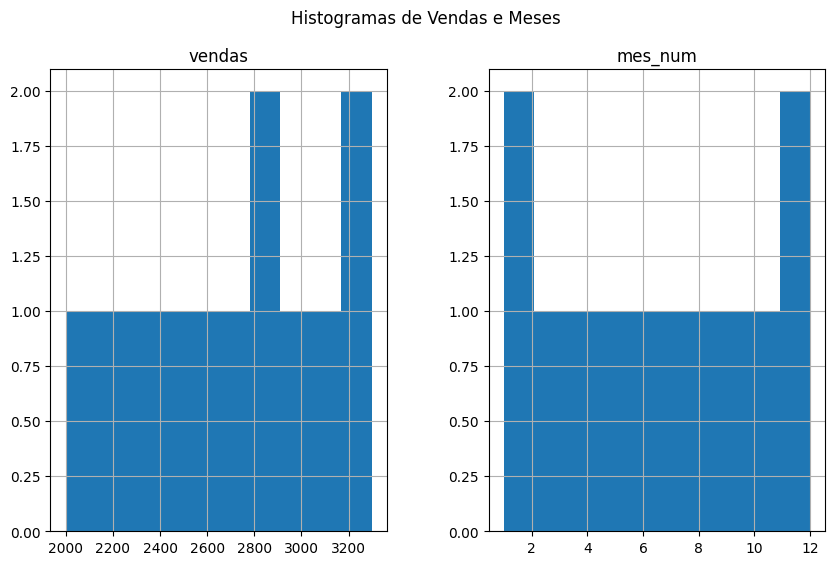

In [18]:
# Histograma
df_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()

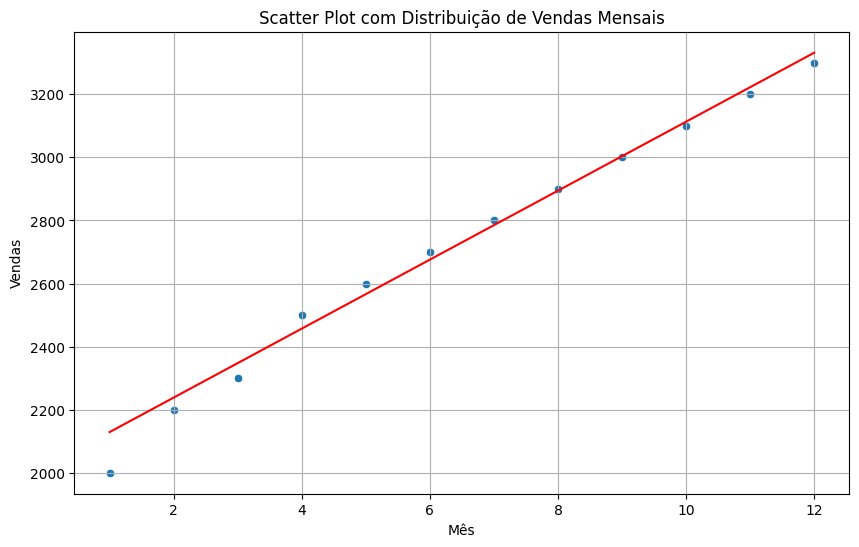

In [17]:
# ScatterPlot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_num', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_num'], modelo_vendas.predict(df_vendas[['mes_num']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()